[대회 링크](https://www.kaggle.com/competitions/bike-sharing-demand/data?select=train.csv)
- datetime: 시간별 날짜 및 타임스탬프
-season: 계절 (1 = 봄, 2 = 여름, 3 = 가을, 4 = 겨울)
- holiday: 해당 날짜가 공휴일인지 여부
- workingday: 해당 날짜가 주말 또는 공휴일이 아닌지 여부
- weather: 날씨 (1: 맑음, 구름이 거의 없음, 약간 흐림, 일부 흐림 / 2: 안개 + 흐림, 안개 + 깨진 구름, 안개 + 일부 구름, 안개 / 3: 가벼운 눈, 가벼운 비 + 천둥 + 흩어진 구름, 가벼운 비 + 흩어진 구름 / 4: 폭우 + 얼음 조각 + 천둥 + 안개, 눈 + 안개)
- temp: 섭씨 온도
- atemp: 체감 온도 (섭씨)
- humidity: 상대 습도
- windspeed: 풍속
- casual: 비등록 사용자 대여 시작 수
- registered: 등록 사용자 대여 시작 수
---
- count: 총 대여 횟수 => 최종 결정 값 target column

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

bike_df = pd.read_csv('/content/drive/MyDrive/Kaggle - 파이썬 머신러닝 완벽 가이드/kaggleData/bike_train.csv')
print(bike_df.shape)
bike_df.head(5)

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [43]:
bike_df.holiday.value_counts()

0    10575
1      311
Name: holiday, dtype: int64

In [44]:
bike_df.workingday.value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

In [45]:
# Column의 type 알아보기!
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


- Datetime column만 object형이기에, 가공이 필요하다
- datetime을 년, 월, 일, 시간의 4개의 속성으로 분리
## **apply(pd.to_dateime)**
> Pandas에서 Datetme과 같은 문자열을 년도, 월, 일, 시간, 분, 초로 편리하게 변환하려면 먼저 문자열을 'datetime' 타입으로 변경해야한다. => **Pandas는 문자열을 datetime으로 변환하는 apply(pd.to_dateime) 메서드를 제공**

In [46]:
# 문자열 => datetime type
bike_df['datetime'] = bike_df.datetime.apply(pd.to_datetime)
# datetime 타입에서 년, 월, 일, 시간 추출
bike_df['year'] = bike_df.datetime.apply(lambda x : x.year) # lambda 입력값 : 얻고자 하는 값
bike_df['month'] = bike_df.datetime.apply(lambda x : x.month)
bike_df['day'] = bike_df.datetime.apply(lambda x : x.day)
bike_df['hour'] = bike_df.datetime.apply(lambda x: x.hour)
bike_df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2


In [47]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  day         10886 non-null  int64         
 15  hour        10886 non-null  int64         
dtypes: datetime64[ns](1), 

In [48]:
drop_columns = ['datetime', 'casual', 'registered']
# casual + registered == count이기에 높은 상관도로 예측을 저해할 우려가 있기에 두 컬럼을 삭제
bike_df.drop(drop_columns, axis = 1, inplace = True)
# axis=0 : 행(row) 방향
# axis=1 : 열(column) 방향

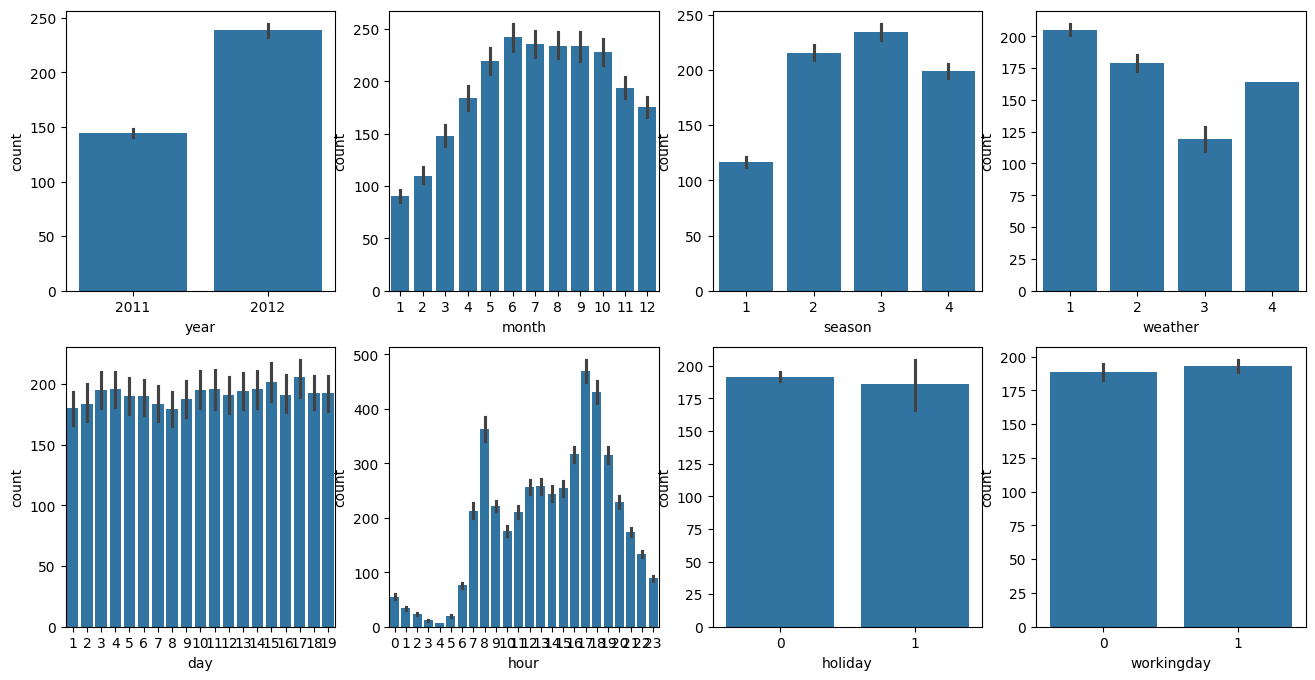

In [49]:
# 주요 column별로 target 값(count) 분포 확인
fig, axs = plt.subplots(figsize = (16,8), ncols = 4, nrows = 2)
cat_features = ['year', 'month','season','weather','day', 'hour', 'holiday','workingday']
# cat_features에 있는 모든 칼럼별로 개별 칼럼값에 따른 count의 합을 barplot으로 시각화
for i, feature in enumerate(cat_features):
  row = int(i/4)
  col = i % 4
  sns.barplot(x = feature, y = 'count', data = bike_df, ax = axs[row][col])

> 성능 평가 => log1p()

- 모델의 성능을 평가할 때에는 사용된 변환 함수가 중요합니다.
- 만약 모델 학습 시 log1p()를 사용하여 데이터를 변환했다면, 모델 평가 시에도 동일한 변환을 적용해야 합니다.
- **그렇지 않으면 모델의 예측과 실제 값 사이에 오차가 발생할 수 있습니다.** 모델의 성능을 평가할 때에는 동일한 변환을 적용하여야 하므로, log1p()로 계산된 값들끼리 비교하는 것이 올바릅니다.

In [50]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def rmsle(y, pred):
  log_y = np.log1p(y)
  log_pred = np.log1p(pred)
  squared_error = (log_y - log_pred) ** 2
  rmsle = np.sqrt(np.mean(squared_error))
  return rmsle

def rmse(y, pred):
  return np.sqrt(mean_squared_error(y, pred))

def evaluate_regr(y, pred):
  rmsle_val = rmsle(y, pred)
  rmse_val = rmse(y, pred)
  mae_val = mean_absolute_error(y,pred)
  print('RMSLE: {0:.3f}, RMSE: {1:.3F}, MAE: {2:.3F}'.format(rmsle_val, rmse_val, mae_val))

> 오류 값에 로그를 씌워서 RMSE를 평가하는 것은 모델의 성능을 더 효과적으로 이해하고, 더 나은 모델을 구축하는 데 도움이 될 수 있습니다.

1. 오류 값의 분포 변환: 일반적으로 오류 값들은 정규 분포를 따르는 것이 이상적입니다. 로그 변환을 통해 오류 값들을 정규 분포에 가깝게 만들 수 있습니다. 이렇게 하면 모델의 예측 오류를 더 잘 이해하고 모델의 성능을 더 효과적으로 평가할 수 있습니다.

2. 오차의 비선형성 보정: 대부분의 회귀 모델은 오차 항이 등분산성을 가정합니다. 하지만 실제 데이터에서는 오차의 분산이 종속 변수의 값에 따라 달라질 수 있습니다. 로그 변환을 통해 오차 항의 비선형성을 줄이고 등분산성을 개선할 수 있습니다.

3. 이상치의 영향 완화: 로그 변환을 통해 데이터의 스케일을 줄일 수 있습니다. 이는 이상치가 모델 학습에 미치는 영향을 완화할 수 있습니다. 로그 변환을 적용하면 이상치의 영향을 줄이고 더 안정적인 모델을 구축할 수 있습니다.

4. RMSE의 해석 향상: 로그를 취한 값에 대해 RMSE를 계산하면, 오류의 크기가 비선형적으로 변화하는 경우에도 모델의 성능을 잘 파악할 수 있습니다. 이는 원래의 오류에 비해 더 나은 해석을 제공할 수 있습니다.

#### **Numpy의 log() / mean_squared_log_error() 사용 시 overflow / underflow 발생 가능에 유의해야 한다.**

```python
def rmsle(y, pred):
  msle = mean_squared_log_error(y, pred)
  rmsle = np.sqrt(mse)
  return rmsle
```
-
언더플로(underflow)와 오버플로(overflow)는 컴퓨터가 표현할 수 있는 수치의 범위를 벗어나는 상황을 가리키는 컴퓨터 과학 용어

> 예를 들어, 32비트 부동 소수점 형식을 사용하는 컴퓨터에서는 대략 1.4 x 10^-45에서 언더플로가 발생하고, 대략 3.4 x 10^38에서 오버플로가 발생합니다. 따라서 이 범위를 벗어나는 값이 발생하면 컴퓨터는 이를 처리할 수 없습니다.

- **log() 함수는 입력이 0 또는 음수일 때 정의되지 않기 때문에 언더플로가 발생할 수 있고, 매우 큰 값의 경우에는 오버플로가 발생할 수 있습니다. 이런 경우에 log1p()를 사용해서 해결 가능하다**

> log1p()로 변환된 값은 다시 numpy의 expm1() 함수로 쉽게 원래의 scale로 복원 가능

- 넘파이(Numpy)의 expm1() 함수는 지수 함수를 계산한 후 1을 빼는 함수





In [51]:
import numpy as np

# 원래 값
original_value = 0.0001

# log1p()로 변환
transformed_value = np.log1p(original_value)

# expm1()로 다시 원래의 scale로 변환
restored_value = np.expm1(transformed_value)

print("Original Value:", original_value)
print("Transformed Value (after log1p):", transformed_value)
print("Restored Value (after expm1):", restored_value)

Original Value: 0.0001
Transformed Value (after log1p): 9.999500033330834e-05
Restored Value (after expm1): 0.0001


> e

- 위의 결과값에서 e는 10의 밑을 나타내는 것이 아니라, 곱셈에 사용되는 기호이다.
- 따라서 9.999500033330834e-05는 지수 표기법으로 9.999500033330834 * 10^(-5)를 의미
- Transformed Value에서의 e는 자연 로그의 밑인 자연 상수를 의미하는 것이 아니라, 지수 표기법에서의 곱셈에 사용되는 기호
- 지수 표기법 : a x 10^n
- Python에서는 e 또는 E를 사용하여 지수 표기법을 표현
- e는 10을 의미하며, E는 10^n를 의미 => 3E2 == 300

> ### 회귀 모델을 이용해 자전거 대여 횟수 예측

- if 회귀 분석에서 결과값이 정규 분포로 되어 있지 않다면?
1. 변수 변환 (Transformation): 종속 변수에 로그 변환, 제곱근 변환 또는 다른 적절한 변환을 적용하여 분포를 정규성에 더 가깝게 만들 수 있습니다.
2. 이상치 처리 (Outlier Handling): 이상치가 정규성을 방해하는 경우, 이상치를 탐지하고 처리하여 결과에 영향을 미치는 이상치를 제거하거나 조정할 수 있습니다.
3. 일반화 선형 모델 (Generalized Linear Models, GLM): 종속 변수가 정규 분포를 따르지 않는 경우에는 GLM을 사용할 수 있습니다. GLM은 종속 변수의 분포를 지정할 수 있으므로, 다양한 종속 변수 분포에 대해 적용할 수 있습니다.
4. 비모수적 방법 (Non-parametric Methods): 회귀 분석 대신 비모수적 방법을 사용할 수 있습니다. 예를 들어, 커널 회귀(kernel regression)나 로버스트 회귀(robust regression)와 같은 방법을 사용할 수 있습니다.
5. 잔차 진단 (Residual Diagnostics): 모델을 적합한 후 잔차를 분석하여 정규성을 평가하고, 필요한 경우 추가적인 조치를 취할 수 있습니다. Q-Q 플롯과 같은 시각화 도구를 사용하여 잔차의 정규성을 확인할 수 있습니다.
6. 부트스트래핑 (Bootstrapping): 부트스트래핑은 재표본추출을 통해 회귀 모델을 여러 번 적합하여 파라미터의 분포를 추정하는 방법입니다. 이는 모델의 불확실성을 고려하고 모델 파라미터의 신뢰 구간을 계산하는 데 유용합니다.


In [52]:
# 로그 변환, 피쳐 인코딩과 모델 학습 / 예측 / 평가
# 회귀 모델 적용 전 data set에 대해
# 결괏값이 정규분포로 돼 있는 지 확인
# category 형 회귀 모델의 경우 원-핫 인코딩으로 feature 인코딩 했는 지 확인
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

y_target = bike_df['count']
X_features = bike_df.drop(['count'], axis = 1, inplace = False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

evaluate_regr(y_test, pred)

RMSLE: 1.165, RMSE: 140.900, MAE: 105.924


In [53]:
# 오류 값이 가장 큰 순 5개 확인해보기
def get_top_error_data(y_test, pred, n_tops = 5):
   # DataFrame의 컬럼들로 실제 대여횟수(count)와 예측 값을 서로 비교 할 수 있도록 생성.
   result_df = pd.DataFrame(y_test.values, columns = ['real_count'])
   result_df['predicted_count']= np.round(pred)
   result_df['diff'] = np.abs(result_df['real_count'] - result_df['predicted_count'])
   print(result_df.sort_values('diff', ascending = False)[:n_tops])

get_top_error_data(y_test,pred,n_tops=5)

      real_count  predicted_count   diff
1618         890            322.0  568.0
3151         798            241.0  557.0
966          884            327.0  557.0
412          745            194.0  551.0
2817         856            310.0  546.0


### -> 예측값과 실제 정답 값 간의 차이가 너무 큰 경우, Target 값의 분포가 왜곡되어 있지는 않은 지를 확인해야 한다.

<Axes: >

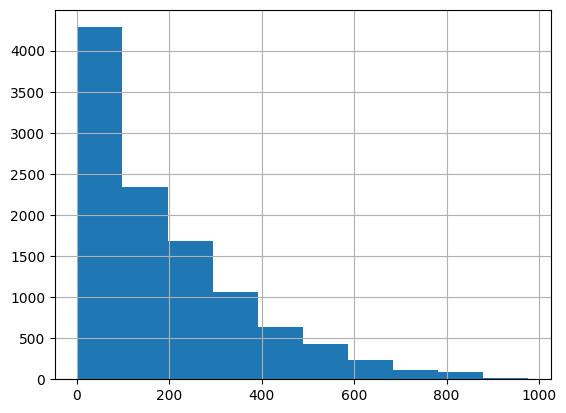

In [54]:
# pandas의 hist()를 이용해 target 값인 count 칼럼이 정규 분포를 이루는 지 확인
y_target.hist()

- count column의 값이 정규 분포가 아닌 0 ~ 200 사이에 왜곡되어 있다.
- 이렇게 왜곡된 값을 정규 분포 형태로 바꾸는 가장 일반적인 방법 : log를 적용
- **log1p()를 이용해서 target 값의 분포를 변경한 채로 모델을 학습하고, model을 평가할 때에는 expm1() 함수를 적용해서 원래 scale 값으로 원상 복구한 후, 평가한다.**

<Axes: >

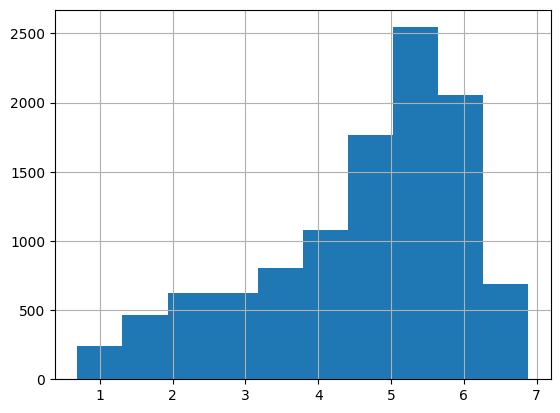

In [55]:
y_log_transform = np.log1p(y_target)
y_log_transform.hist()
# Target 값을 log로 변환한 후에 정규 분포 형태는 아니어도, 변환 이전보다 왜곡 정도가 많이 향상 되었음을 알 수 있다.

In [56]:
# 타깃 칼럼인 count 값을 log1p로 로그 변환
y_target_log = np.log1p(y_target)

# 로그 변환된 y_target_log를 반영하여 학습/테스트 데이터 셋 분할
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target_log, test_size=0.3, random_state=0)
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

# 테스트 데이터 셋의 Target 값은 Log 변환되었으므로 다시 expm1를 이용하여 원래 scale로 변환
y_test_exp = np.expm1(y_test)

# 예측 값 역시 Log 변환된 타깃 기반으로 학습되어 예측되었으므로 다시 exmpl으로 scale변환
pred_exp = np.expm1(pred)

evaluate_regr(y_test_exp ,pred_exp)

RMSLE: 1.017, RMSE: 162.594, MAE: 109.286


<Axes: ylabel='None'>

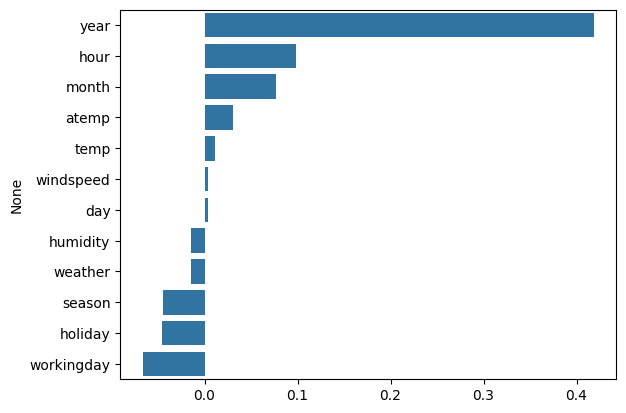

In [57]:
coef = pd.Series(lr_reg.coef_ , index = X_features.columns)
# Series 객체를 생성할 때, index를 지정해주면 해당 index에 따라 Series의 각 값이 정렬됨
coef_sort = coef.sort_values(ascending = False)
sns.barplot(x = coef_sort.values, y = coef_sort.index)

> 결과 해석
- month는 1,2,3,4,...
- year는 2011, 2012...
- 위의 column들이 회귀 계수가 높은데, 이런 column들은 개별 숫자값의 크기가 의미가 있는 것은 아니다.
- ### year, month, hour 등은 숫자 값으로 표현되었기는 하나, 모두 category형 feature이다.
- 사이킷런에는 카테고리형 데이터만을 위한 데이터 타입이 없기에, 모두 숫자로 변환해주어야 한다.
- but, 이처럼 숫자형 카테고리 값을 선형 회귀에 사용할 경우, 회귀 계수를 연산할 때 이 숫자형 값에 크게 영향을 받는 경우가 발생할 수 있다. => 따라서 선형 회귀에서는 **이러한 피처 인코딩에 원핫인코딩을 적용해 변환해야 한다.**

#### Pd.getdummies()
- pd.get_dummies() 함수는 범주형(categorical) 데이터를 더미(dummy) 변수로 변환하는 데 사용됩니다. 이 함수는 주어진 DataFrame의 범주형 변수를 원-핫 인코딩(one-hot encoding)된 형태로 변환하여 새로운 DataFrame을 반환합니다.

- 예를 들어, 성별을 나타내는 'Male'과 'Female'과 같은 범주형 변수가 있다고 가정해보겠습니다. 이러한 변수는 기계학습 모델에 직접 사용될 수 없으므로, 더미 변수로 변환해야 합니다. pd.get_dummies() 함수를 사용하면 각 범주값에 대해 새로운 열을 생성하고 해당 값에 해당하는 열에는 1을, 다른 열에는 0을 할당하여 이를 구현할 수 있습니다.


```python
import pandas as pd

data = {'gender': ['Male', 'Female', 'Female', 'Male']}
df = pd.DataFrame(data)

# 'gender' 열을 더미 변수로 변환
dummy_df = pd.get_dummies(df['gender'])
print(dummy_df)

####result####
   Female  Male
0       0     1
1       1     0
2       1     0
3       0     1
```



In [58]:
X_features_ohe = pd.get_dummies(X_features, columns=['year', 'month','day', 'hour', 'holiday',
                                              'workingday','season','weather'])

In [63]:
# 원-핫 인코딩이 적용된 feature 데이터 세트 기반으로 학습/예측 데이터 분할.
X_train, X_test, y_train, y_test = train_test_split(X_features_ohe, y_target_log,
                                                    test_size=0.3, random_state=0)

In [64]:
# 모델과 학습/테스트 데이터 셋을 입력하면 성능 평가 수치를 반환
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1 = False):
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  if is_expm1 :
    y_test = np.expm1(y_test)
    pred = np.expm1(pred)
  print('###',model.__class__.__name__,'###')
  evaluate_regr(y_test, pred)
  # end of function get_model_predict

# model 별로 평가 수행
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.01)

for model in [lr_reg, ridge_reg, lasso_reg]:
    get_model_predict(model,X_train, X_test, y_train, y_test,is_expm1=True)

### LinearRegression ###
RMSLE: 0.590, RMSE: 97.688, MAE: 63.382
### Ridge ###
RMSLE: 0.590, RMSE: 98.529, MAE: 63.893
### Lasso ###
RMSLE: 0.635, RMSE: 113.219, MAE: 72.803


<Axes: ylabel='None'>

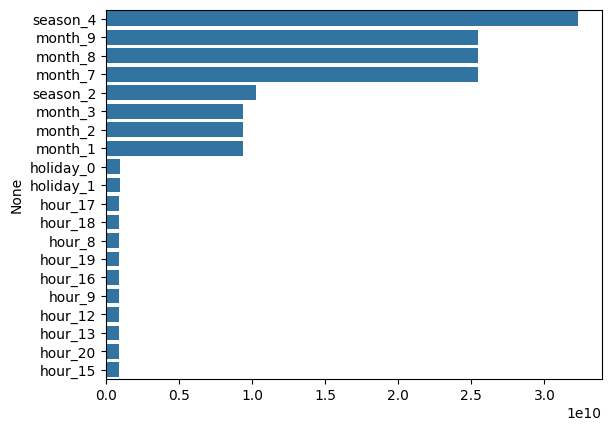

In [65]:
# one hot encoding된 data set 에서 회귀 계수가 높은 feature를 다시 시각화
coef = pd.Series(lr_reg.coef_ , index = X_features_ohe.columns)
coef_sort = coef.sort_values(ascending = False)[:20]
sns.barplot(x=coef_sort.values , y=coef_sort.index)

### **회귀 트리를 이용해 회귀 예측을 수행**

In [67]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# 랜덤 포레스트, GBM, XGBoost, LightGBM model 별로 평가 수행
rf_reg = RandomForestRegressor(n_estimators= 500)
gbm_reg = GradientBoostingRegressor(n_estimators= 500)
xgb_reg = XGBRegressor(n_estimators=500)
lgbm_reg = LGBMRegressor(n_estimators=500)

for model in [rf_reg, gbm_reg, xgb_reg, lgbm_reg]:
  # XGBoost의 경우 DataFrame이 입력 될 경우 버전에 따라 오류 발생 가능. ndarray로 변환.
    get_model_predict(model,X_train.values, X_test.values, y_train.values, y_test.values,is_expm1=True)
    # .values를 사용하여 DataFrame을 ndarray로 변환할 때에는 원본 DataFrame이 변경되지 않음

### RandomForestRegressor ###
RMSLE: 0.355, RMSE: 50.317, MAE: 31.149
### GradientBoostingRegressor ###
RMSLE: 0.330, RMSE: 53.348, MAE: 32.748
### XGBRegressor ###
RMSLE: 0.339, RMSE: 51.475, MAE: 31.357
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000756 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 348
[LightGBM] [Info] Number of data points in the train set: 7620, number of used features: 72
[LightGBM] [Info] Start training from score 4.582043
### LGBMRegressor ###
RMSLE: 0.319, RMSE: 47.215, MAE: 29.029


In [66]:
X_train.values

array([[32.8  , 37.12 , 52.   , ...,  0.   ,  0.   ,  0.   ],
       [32.8  , 35.605, 36.   , ...,  0.   ,  0.   ,  0.   ],
       [ 4.92 ,  6.82 , 50.   , ...,  0.   ,  0.   ,  0.   ],
       ...,
       [27.06 , 31.06 , 39.   , ...,  0.   ,  0.   ,  0.   ],
       [14.76 , 17.425, 87.   , ...,  1.   ,  0.   ,  0.   ],
       [33.62 , 35.605, 30.   , ...,  0.   ,  0.   ,  0.   ]])

=> numpy ndarray 데이터 타입으로 변경하면서 column명들이 다 사라졌는데 feature 중요도를 알아낼 수 있는가?

- feature 중요도를 알아내는 것은 가능합니다. XGBoost 모델을 학습시킬 때 사용된 feature의 순서는 변경되지 않습니다. 따라서 학습된 모델에서 feature 중요도를 추출할 때, feature의 순서를 기반으로 해당 중요도를 해석할 수 있습니다.

- feature 중요도는 학습된 XGBoost 모델의 feature_importances_ 속성을 통해 알 수 있습니다. 이 중요도는 해당 feature가 모델의 예측에 얼마나 영향을 미치는지를 나타냅니다. 따라서 모델을 학습할 때 사용된 feature 순서와 함께 중요도를 살펴보면, 각 feature의 상대적인 중요도를 파악할 수 있습니다.